### Library import

In [1]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from MLP_utils import *
from Mlp_model import MlpPokemon

### Data import

In [2]:
pokemon = pd.read_csv("data/all_pokemon_data.csv")
pokemon["Legendary Status"] = pokemon["Legendary Status"].astype(int)
pokemon = pokemon.loc[~pokemon["Name"].str.contains("-mega")]
del pokemon["National Dex #"] # redondant column
del pokemon["Height (dm)"] # redondant column
del pokemon["Weight (hg)"] # redondant column
del pokemon["Base Stat Total"] # it is just the sum of all stat, not very new
del pokemon["Name"] # delet pokemon name (not needed)
pokemon.to_csv("data/all_pokemon_filter.csv")

## Data exploration

In [3]:
pokemonNumber = pokemon.select_dtypes(include = "number")

Text(0.5, 1.0, 'Pokemon numeric attributes correlation')

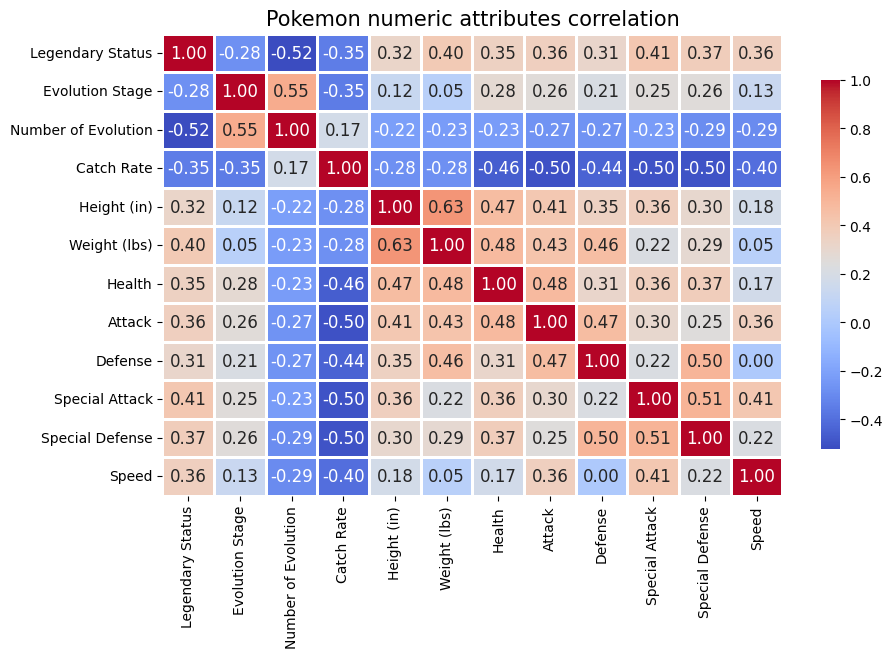

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    pokemonNumber.corr(),
    annot=True,                   # Afficher les valeurs
    cmap="coolwarm",              # Palette de couleurs alternative plus lisible
    annot_kws={"size": 12},       # Augmente la taille des annotations
    fmt=".2f",                    # Format des nombres (2 décimales)
    linewidths=1,                 # Ajoute des lignes entre les cellules
    cbar_kws={"shrink": 0.8}      # Ajuste la taille de la barre de couleur
)
plt.title("Pokemon numeric attributes correlation", size = 15)

### Loading processed data

In [5]:
# X_train is a SMOTE object
# y_train is a SMOTE object
# X_test not a SMOTE object, but cat values has been converted into numeric vectors
# y_test is inchanged
X_train, y_train, X_test, y_test, preprocessor = prepareDataForMlp(pokemon)
X_train_df = encodedDataToDataFrame(preprocessor, X_train)
X_test_df = encodedDataToDataFrame(preprocessor, X_test)

In [6]:
mlp = MlpPokemon(X_train, y_train, X_test, y_test, preprocessor)
trainLoss, predictLoss, yPred = mlp.classicPredict()

  3%|▎         | 32/1000 [00:01<00:48, 19.93it/s]

Early stopping after 33 epochs


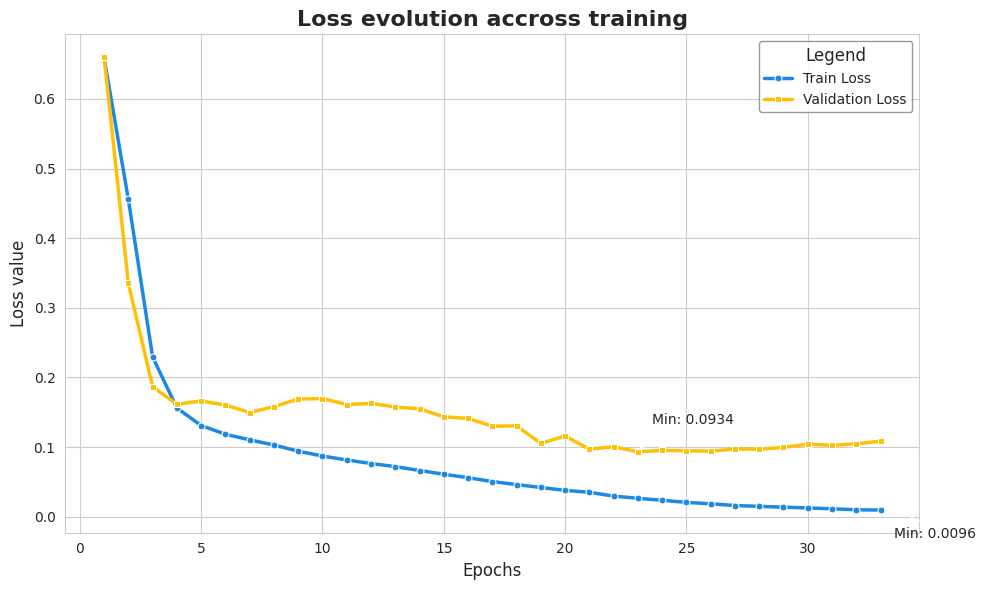

In [7]:
lossPlot(trainLoss, predictLoss)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
yPredclass = (yPred >=0.15).float().numpy()
conf = confusion_matrix(y_pred=yPredclass, y_true=y_test.numpy())
print(conf)
# Calculer d'autres métriques
accuracy = accuracy_score(y_test.numpy(), yPredclass)
precision = precision_score(y_test.numpy(), yPredclass)
recall = recall_score(y_test.numpy(), yPredclass)
f1 = f1_score(y_test.numpy(), yPredclass)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


[[191   3]
 [  3  31]]
Accuracy: 0.9737
Precision: 0.9118
Recall: 0.9118
F1 Score: 0.9118


Text(0.5, 1.0, 'Precision-Recall Curve')

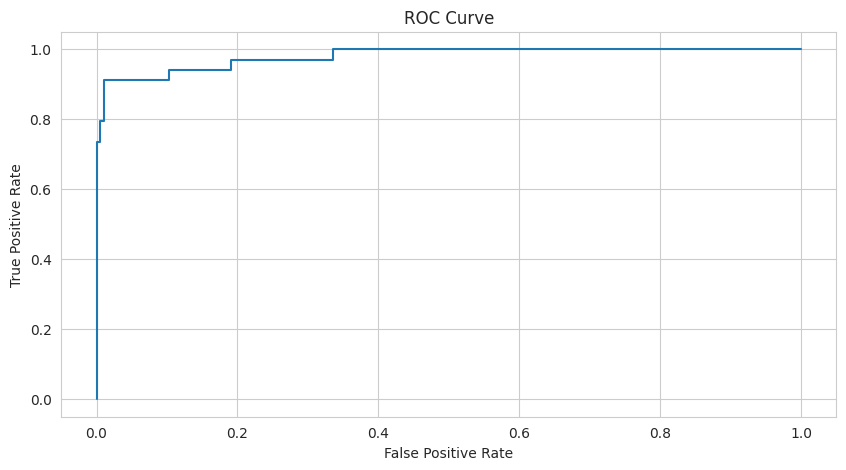

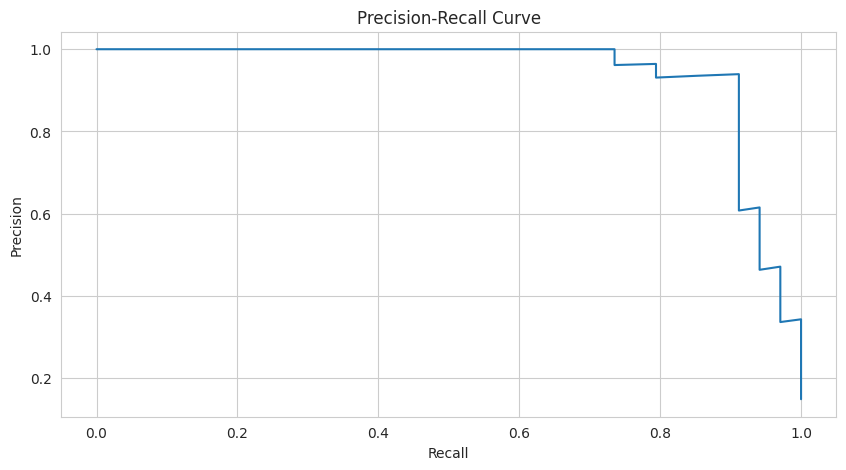

In [13]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# ROC Curve (équilibré)
fpr, tpr, thresholds = roc_curve(y_test.numpy(), yPred.numpy())
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Precision-Recall Curve (meilleur pour classes déséquilibrées)
precision, recall, thresholds = precision_recall_curve(y_test.numpy(), yPred.numpy())
plt.figure(figsize=(10, 5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

In [14]:
# Trouver le seuil optimal pour le F1-score
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for threshold in thresholds:
    y_pred_t = (yPred >= threshold).float().numpy()
    f1_scores.append(f1_score(y_test.numpy(), y_pred_t))

optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Seuil optimal: {optimal_threshold:.2f}")

Seuil optimal: 0.15


### Processed data visualisation

- Numeric features

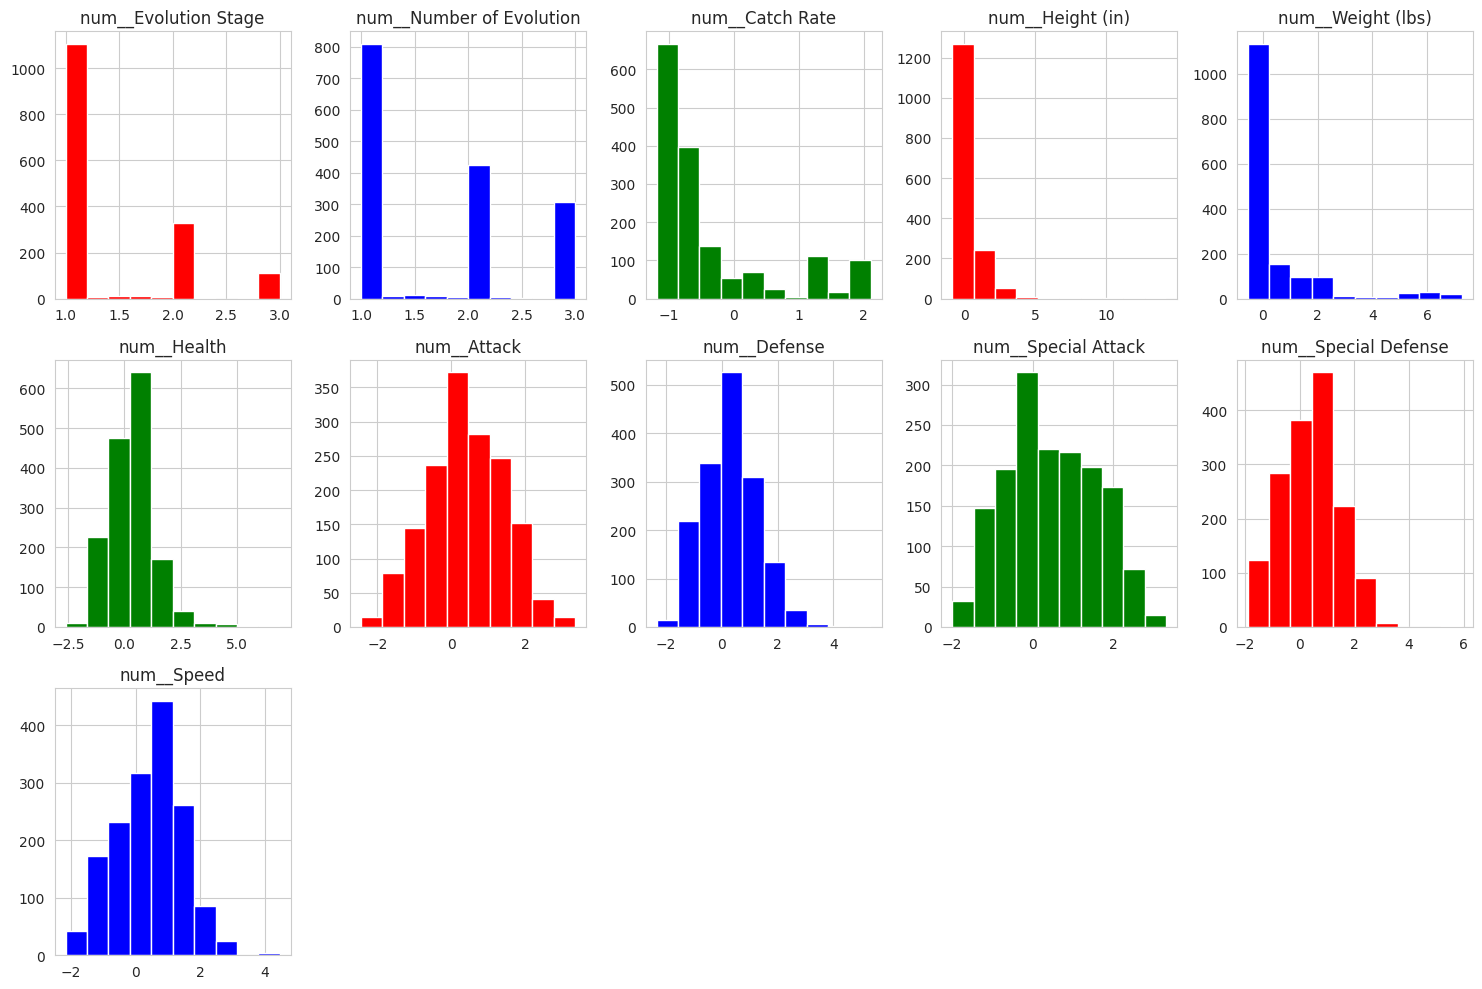

In [ ]:
numDataDistribution(X_train_df, nbPlot= 11)

- Categorical features

/home/edmond/Documents/PytorchProjects/MLP/MLP_pytorch/MLP_utils.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(catColMinimal, rotation=90)
/home/edmond/Documents/PytorchProjects/MLP/MLP_pytorch/MLP_utils.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(catColMinimal, rotation=90)
/home/edmond/Documents/PytorchProjects/MLP/MLP_pytorch/MLP_utils.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(catColMinimal, rotation=90)
/home/edmond/Documents/PytorchProjects/MLP/MLP_pytorch/MLP_utils.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(catColMinimal, rotation=90)


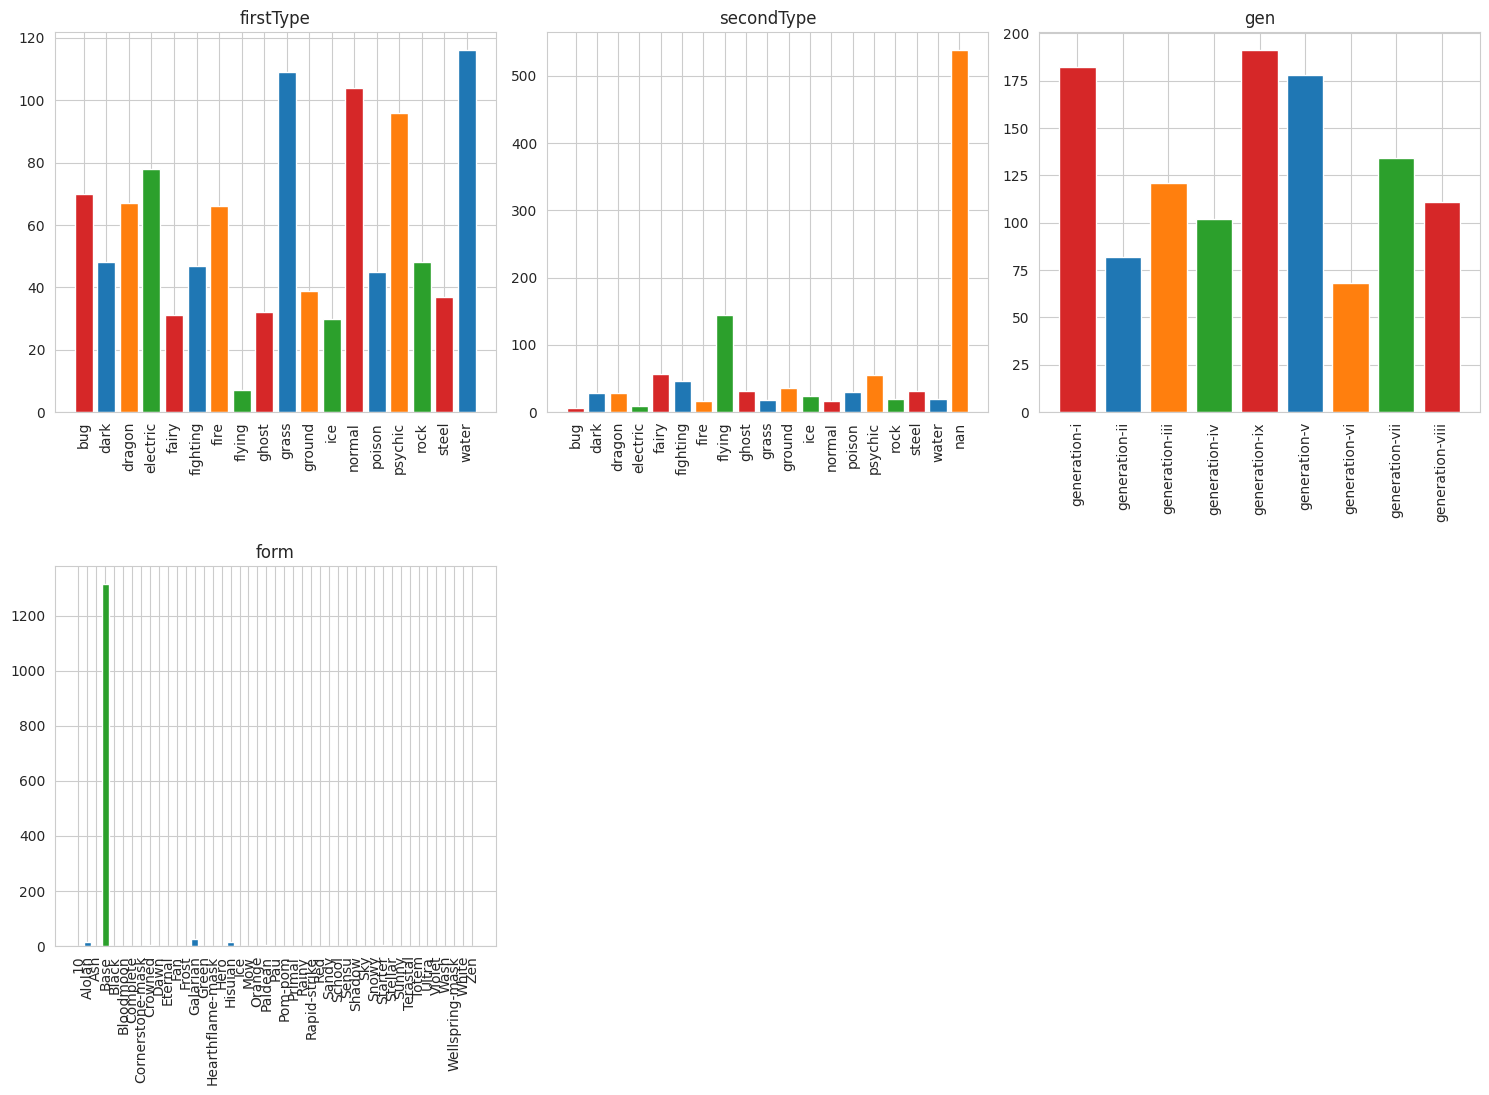

In [ ]:
multiplePlot(X_train_df)

In [ ]:
catLegendaryDistribution(pd.DataFrame(y_train))

KeyError: 'Legendary Status'

### Prediction